In [1]:
 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math
Titanic_data=pd.read_excel("titanic3.xls")
Titanic_data


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [2]:
print("# number of passenger in original Data: "+str(len(Titanic_data.index)))

# number of passenger in original Data: 1309


Analyzing Data

In [3]:
sns.countplot(x="survived",data=Titanic_data) 
 
 

<Axes: xlabel='survived', ylabel='count'>

In [4]:
sns.countplot(x="survived",hue="sex",data=Titanic_data) 
 

<Axes: xlabel='survived', ylabel='count'>

In [5]:
sns.countplot(x="survived",hue="parch",data=Titanic_data)

<Axes: xlabel='survived', ylabel='count'>

In [6]:
Titanic_data["age"].plot.hist() 

<Axes: ylabel='Frequency'>

In [7]:
Titanic_data.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [8]:
Titanic_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [9]:
sns.countplot(x="sibsp",data=Titanic_data)

<Axes: xlabel='sibsp', ylabel='Frequency'>

In [10]:
sns.countplot(x="parch",data=Titanic_data)

<Axes: xlabel='sibsp', ylabel='Frequency'>

Data Wrangling

In [11]:
Titanic_data.isnull()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,False,True,True,False
3,False,False,False,False,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,False,False,False,False,False,False,False,False,False,True,False,True,False,True
1305,False,False,False,False,True,False,False,False,False,True,False,True,True,True
1306,False,False,False,False,False,False,False,False,False,True,False,True,False,True
1307,False,False,False,False,False,False,False,False,False,True,False,True,True,True


In [12]:
Titanic_data.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [13]:
sns.heatmap(Titanic_data.isnull(),xticklabels=True,cmap="viridis")
 

<Axes: >

In [14]:
sns.boxplot(x="parch",y="age",data=Titanic_data)

<Axes: xlabel='parch', ylabel='age'>

In [15]:
 
Titanic_data.drop("cabin",axis=1,inplace=True)

In [16]:
 
# Fill missing values
Titanic_data['age'].fillna(Titanic_data['age'].median(), inplace=True)
Titanic_data['fare'].fillna(Titanic_data['fare'].median(), inplace=True)
Titanic_data['embarked'].fillna(Titanic_data['embarked'].mode()[0], inplace=True)

# Drop high-missing or irrelevant columns
Titanic_data.drop([ 'boat', 'body', 'home.dest', 'name', 'ticket'], axis=1, inplace=True)

# Convert categorical columns into dummy/indicator variables
Titanic_data = pd.get_dummies(Titanic_data, columns=['sex', 'embarked'], drop_first=True)

# Final check 
print(Titanic_data.dtypes)
print(Titanic_data.isnull().sum())
print(Titanic_data)
 

pclass          int64
survived        int64
age           float64
sibsp           int64
parch           int64
fare          float64
sex_male         bool
embarked_Q       bool
embarked_S       bool
dtype: object
pclass        0
survived      0
age           0
sibsp         0
parch         0
fare          0
sex_male      0
embarked_Q    0
embarked_S    0
dtype: int64
      pclass  survived      age  sibsp  parch      fare  sex_male  embarked_Q  \
0          1         1  29.0000      0      0  211.3375     False       False   
1          1         1   0.9167      1      2  151.5500      True       False   
2          1         0   2.0000      1      2  151.5500     False       False   
3          1         0  30.0000      1      2  151.5500      True       False   
4          1         0  25.0000      1      2  151.5500     False       False   
...      ...       ...      ...    ...    ...       ...       ...         ...   
1304       3         0  14.5000      1      0   14.4542     Fals

C:\Users\user\AppData\Local\Temp\ipykernel_2136\496236989.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Titanic_data['age'].fillna(Titanic_data['age'].median(), inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_2136\496236989.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

In [17]:
 
from sklearn.model_selection import train_test_split
X=Titanic_data.drop("survived",axis=1)
y=Titanic_data["survived"]
 

In [18]:
 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=1)

In [19]:
from sklearn.linear_model import LogisticRegression
log_model=LogisticRegression()
log_model.fit(X_train,y_train)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [20]:
prediction=log_model.predict(X_test)
from sklearn.metrics import classification_report
classification_report(y_test,prediction)

'              precision    recall  f1-score   support\n\n           0       0.81      0.89      0.85       195\n           1       0.81      0.70      0.75       133\n\n    accuracy                           0.81       328\n   macro avg       0.81      0.79      0.80       328\nweighted avg       0.81      0.81      0.81       328\n'

In [21]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,prediction)

array([[173,  22],
       [ 40,  93]], dtype=int64)

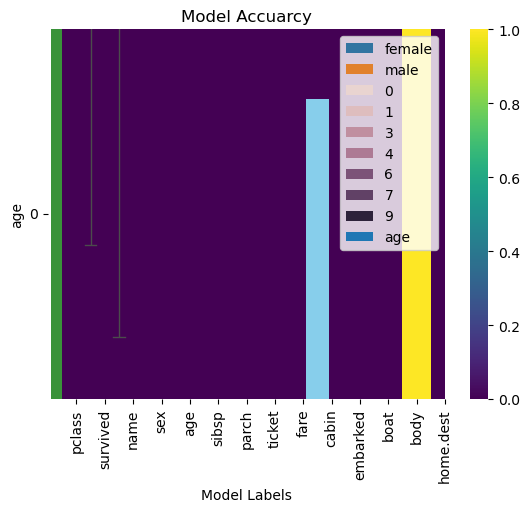

In [22]:
from sklearn.metrics import accuracy_score
#Accuracy = (Sum of Correct Predictions) / (Sum of Total Predictions)
a=accuracy_score(y_test,prediction)
plt.bar(["ACCuracy"],[a],color="skyblue")
plt.ylim(0,1)
plt.title("Model Accuarcy")
plt.xlabel("Model Labels")
plt.show()

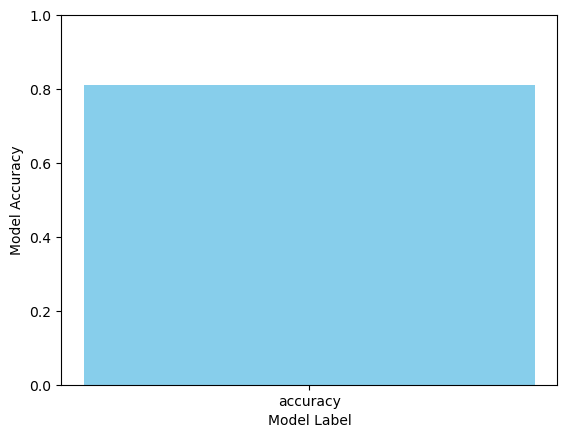

In [23]:
from sklearn.metrics import accuracy_score
b=accuracy_score(y_test,prediction)
plt.bar(["accuracy"],[a],color="skyblue")
plt.ylim(0,1)
plt.ylabel("Model Accuracy")
plt.xlabel("Model Label")
plt.show()

